<a href="https://colab.research.google.com/github/haripranesh1505/Innomatics/blob/main/Hari_Pranesh_Innomatics_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#HARI PRANESH M
#7200832072

#haripranesh.m@gmail.com

In [1]:
import matplotlib.pyplot as plt
from sklearn import linear_model
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df=pd.read_csv('/content/dataframe_.csv')
df

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214
...,...,...
1692,25.410184,-76.380902
1693,29.537304,-82.796934
1694,31.633331,-87.000000
1695,29.091458,-104.943052


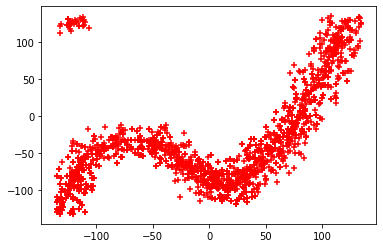

In [3]:
%matplotlib inline

plt.scatter(df.input,df.output, color='red', marker='+')

In [4]:
# Remove rows with missing values in the 'input' and 'output' columns
df = df.dropna(subset=['input', 'output'])

# Create a linear regression model and fit it to the data
model = linear_model.LinearRegression()
model.fit(df[['input']], df['output'])

LinearRegression()

In [5]:
X = df[['input']]
y = df['output']

In [6]:
model.coef_

array([0.42604447])

In [7]:
model.intercept_

-34.58220008713727

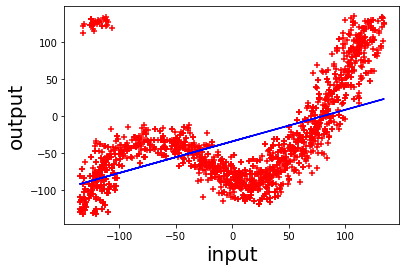

In [8]:
%matplotlib inline
plt.xlabel('input',fontsize=20)
plt.ylabel('output',fontsize=20)
plt.scatter(df.input,df.output, color='red', marker='+')
plt.plot(df.input,model.predict(X),color='blue')

In [9]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE): {:.2f}".format(mse))

# Calculate the mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE): {:.2f}".format(mae))

# Calculate the coefficient of determination (R^2)
r2 = r2_score(y_test, y_pred)
print("R^2 Score: {:.2f}".format(r2))


Mean Squared Error (MSE): 3291.41
Mean Absolute Error (MAE): 43.90
R^2 Score: 0.30


#Hyper Tuning

In [10]:
Q1 = df['input'].quantile(0.25)
Q3 = df['input'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['input'] < (Q1 - 1.5 * IQR)) | (df['input'] > (Q3 + 1.5 * IQR)))]

In [11]:
X = df[['input']]
y = df['output']

In [12]:
#Create a pipeline for the data pre-processing and model training
pipeline = Pipeline([
('scaler', StandardScaler()),
('imputer', SimpleImputer()),
('regressor', RandomForestRegressor(n_estimators=100, random_state=0))
])

pipeline.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()), ('imputer', SimpleImputer()),
                ('regressor', RandomForestRegressor(random_state=0))])

In [13]:
# Use the pipeline to make predictions on the test data
y_pred = pipeline.predict(X)

In [14]:
# Evaluate the model performance
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

# Print the evaluation metrics
print("Mean Squared Error: {:.2f}".format(mse))
print("R2 Score: {:.2f}".format(r2))


lr_score = model.score(X_test, y_test)
print("Test score: {:.2f}".format(lr_score))

Mean Squared Error: 252.25
R2 Score: 0.94
Test score: 0.30


#RANDOM FOREST

In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[['input']], df['output'], test_size=0.2, random_state=0)

# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=0)
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
score = model.score(X_test, y_test)
print("Test score: {:.2f}".format(score))

Test score: 0.69


In [16]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate the mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE): {:.2f}".format(mse))

# Calculate the mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE): {:.2f}".format(mae))

# Calculate the coefficient of determination (R^2)
r2 = r2_score(y_test, y_pred)
print("R^2 Score: {:.2f}".format(r2))


Mean Squared Error (MSE): 1481.45
Mean Absolute Error (MAE): 19.06
R^2 Score: 0.69


#Hyper Tuning

In [17]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats


# Detect and treat outliers
z = np.abs(stats.zscore(df))
df = df[(z < 3).all(axis=1)]

# Define the feature and target arrays
X = df[['input']]
y = df['output']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Define the pipeline for feature scaling and model fitting
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', RandomForestRegressor(n_estimators=100, random_state=0))
])

# Define the hyperparameters and possible values for grid search
param_grid = {
    'model__n_estimators': [50, 100, 200],
    'model__max_depth': [5, 10, 20],
    'model__min_samples_split': [2, 4, 8]
}

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(pipeline, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Train the model with the best hyperparameters
model = grid_search.best_estimator_
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
rf_score = model.score(X_test, y_test)
print("Test score: {:.2f}".format(rf_score))


Test score: 0.72


#SVM


In [18]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[['input']], df['output'], test_size=0.2, random_state=0)

# Train the model
model = SVR(kernel='linear')
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
score = model.score(X_test, y_test)
print("Test score: {:.2f}".format(score))


Test score: 0.27


#Hyper Tuning

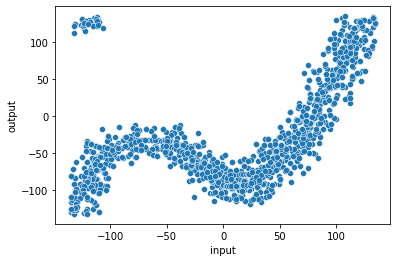

Test score: 0.27
Best hyperparameters: {'C': 10, 'degree': 2, 'kernel': 'rbf'}
Best score: 0.65
Test score of the final model: 0.72


In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# Load the data
# df = pd.read_csv("data.csv")

# Detect and treat outliers
z = np.abs(stats.zscore(df))
df = df[(z < 3).all(axis=1)]

# Plot the data to visualize the relationship between the input and output
sns.scatterplot(x='input', y='output', data=df)
plt.show()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[['input']], df['output'], test_size=0.2, random_state=0)

# Train the model
model = SVR(kernel='linear')
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
score = model.score(X_test, y_test)
print("Test score: {:.2f}".format(score))

# Define the parameter grid for hyperparameter tuning
param_grid = {'C': [0.1, 1, 10, 100],
              'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
              'degree': [2, 3, 4]}

# Perform grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the best score achieved during the grid search
print("Best hyperparameters:", grid_search.best_params_)
print("Best score: {:.2f}".format(grid_search.best_score_))

# Train the final model with the best hyperparameters
model = SVR(C=grid_search.best_params_['C'],
            kernel=grid_search.best_params_['kernel'],
            degree=grid_search.best_params_['degree'])
model.fit(X_train, y_train)

# Evaluate the final model on the test data
svm_score = model.score(X_test, y_test)
print("Test score of the final model: {:.2f}".format(svm_score))


#Comparsion

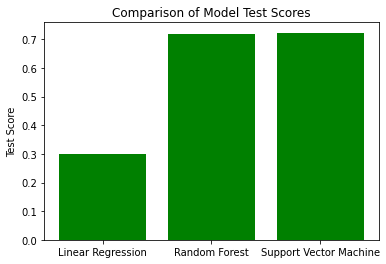

In [20]:
import matplotlib.pyplot as plt

# Define the test scores for each model
scores = {'Linear Regression': lr_score,
          'Random Forest': rf_score,
          'Support Vector Machine': svm_score}

# Plot the scores as a bar chart
plt.bar(scores.keys(), scores.values(), color='g')
plt.ylabel('Test Score')
plt.title('Comparison of Model Test Scores')
plt.show()


The best model is Random forest and Support vector machine

Here are some observations about the three models:

Linear Regression:

Linear Regression is a simple and fast model that is suitable for linear relationships between the input and output features.
It is highly interpretable, as the coefficients of the model can be used to determine the impact of each input feature on the output.
However, it may not perform well on complex or non-linear relationships between the input and output.
Random Forest:

Random Forest is an ensemble of decision trees that is capable of modeling non-linear relationships.
It can handle large datasets with many features and can handle missing or noisy data.
However, it may be less interpretable compared to Linear Regression, as the relationships between the input and output features are determined by many decision trees.


Support Vector Machine (SVM):

SVM is a powerful model for classification and regression tasks, particularly for problems with high-dimensional data and non-linear relationships.
It can handle large datasets with many features and is highly effective for small datasets as well.
However, SVM may be more computationally expensive than other models and may be less interpretable compared to Linear Regression.
In conclusion, it is important to consider the type of problem, the size of the data, the number of features, and the quality of the data when choosing a model. It may be useful to try several models and compare their performance to determine the best model for a particular problem.



